In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

%matplotlib inline
actual_fits_med = pd.read_csv("../Results/median_temps/sites_boltz_fit_median_temps_only_results.csv")
actual_fits_med = actual_fits_med.sort_values(by = 'site_ID', ascending = True)
fluxnet_med = pd.read_pickle("../Data/median_temps/fluxnet_median_temps_only.pkl")
fluxnet_med = fluxnet_med.sort_values(by = 'siteID', ascending = True)
import seaborn as sns

## Looking at the max temp vs. E in the outlying sites

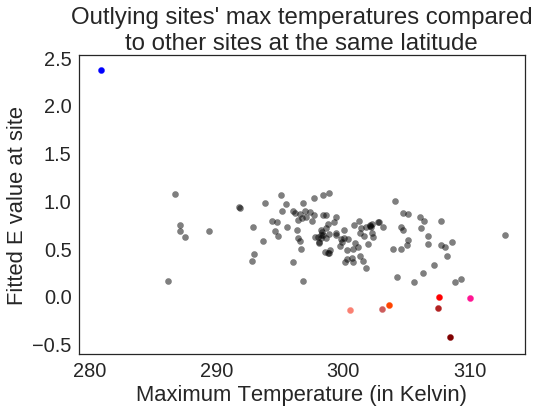

In [11]:
# getting the max temperatures from each of the sites
max_temps = fluxnet_med.groupby('siteID')['TA_F_inKelvin'].max().tolist()
min_temps = fluxnet_med.groupby('siteID')['TA_F_inKelvin'].min().tolist()
# creating a new data frame with these max temps, siteID, absolute lat, and fitted E values
max_temps_df = pd.DataFrame({'max_temps' : max_temps, 'min_temps' : min_temps, 
                             'temp_range' : list(np.array(max_temps) - np.array(min_temps)), 
                             'siteID' : pd.Series.unique(fluxnet_med.siteID),
                             'abs_lat' : np.abs(actual_fits_med.lat), 
                             'E' : actual_fits_med.E}) 

# getting the outlier values' siteIDs and E values
outliers = list(actual_fits_med.site_ID[(actual_fits_med.E < 0) | (actual_fits_med.E > 2)])
outlier_E_vals = max_temps_df[max_temps_df.siteID.isin(outliers)]

# getting the non-outlier E values
non_outlier_E_vals = max_temps_df[~max_temps_df.siteID.isin(outliers)]

# making colour codes for the different outlier sites so that I can identify them more easily
colors = ['red', 'orangered', 'indianred', 'salmon', 'blue', 'deeppink', 'firebrick', 'maroon']

# initializing a counter variable
i = 0



# building a scatter plot of the non-outlying points
paper_rc = {'lines.linewidth': 3, 'lines.markersize': 5}  
sns.set(font_scale=2, style = 'white', rc = paper_rc) 
plt.scatter(non_outlier_E_vals.max_temps, non_outlier_E_vals.E, color = 'black', alpha = 0.5, s = 38)

# going through each outlier site and plotting their point in their designated colour
# and also with a label of the siteID at the point
for site in outliers:
    #plt.text(outlier_E_vals.max_temps[outlier_E_vals.siteID == site], 
            # outlier_E_vals.E[outlier_E_vals.siteID == site], '%s' % site, fontsize = 16)
    plt.scatter(outlier_E_vals.max_temps[outlier_E_vals.siteID == site], 
                outlier_E_vals.E[outlier_E_vals.siteID == site], 
                color = colors[i], s = 38)
    i = i + 1

plt.xlabel('Maximum Temperature (in Kelvin)')
plt.ylabel('Fitted E value at site')
plt.title("Outlying sites' max temperatures compared\nto other sites at the same latitude")

